In [2]:
import sys
sys.path.append('..')

In [3]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import electrode2currentmap as e2cm
reload(e2cm)

<module 'electrode2currentmap' from '../electrode2currentmap.py'>

In [47]:
electrode_radius = 200 
sizex = 5000
sizey = 5000
sampling=25
alpha=14000
n=1.69


x = -100 

y = -200
[gridx, gridy] = np.meshgrid(np.arange(-sizex//2, sizex//2, sampling),
                     np.arange(-sizey//2, sizey//2, sampling))


r = np.sqrt((gridx + x) ** 2 + (gridy + y) ** 2)
cspread = np.ones(r.shape)
cspread[r > electrode_radius] = alpha / (alpha + (r[r > electrode_radius] - electrode_radius) ** n)

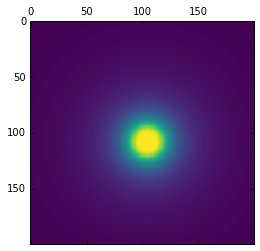

In [48]:
plt.figure()
plt.matshow(cspread, cmap='viridis')

#plt.figure()
#plt.plot(cspread[sizex//2])

In [49]:
r = e2cm.Retina(axon_map='axons.npz')

In [52]:
e1 = e2cm.Electrode(200, 0, 0, 0)
e2 = e2cm.Electrode(200, -1000, 1000, 0)

# original code had an additional argument alpha (scaling factor, to do with the current fall-off)
#e1 = electrode2currentmap.Electrode(200, 0, 0, 5000, 5000)
#e2 = electrode2currentmap.Electrode(200, -1000, 1000, 5000, 5000)

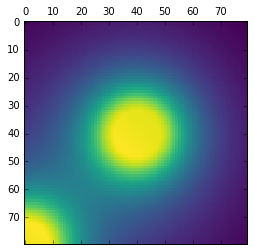

In [53]:
plt.matshow(e1.current_spread(r.gridx, r.gridy) + e2.current_spread(r.gridx, r.gridy), cmap='viridis')

# original code called it scale
#plt.matshow(e1.scale + e2.scale, cmap='viridis')

In [62]:
# Create an ElectrodeArray object:
# e_all = e2cm.ElectrodeArray(rlist,xlist,ylist,hlist)
e_all = e2cm.ElectrodeArray([200, 200], [0, -1000], [0, 1000], [0, 0])

# original code:
# e2cm.ElectrodeArray(200, 0, 0, 0)
# my_grid = e2cm.ElectrodeGrid([100, 200], [0, -1000], [0, 1000], 5000, 5000)

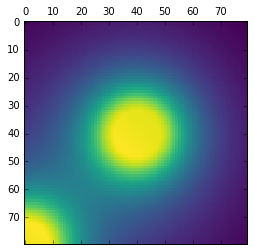

In [63]:
plt.matshow(e_all.current_spread(r.gridx, r.gridy), cmap='viridis')

In [64]:
sum1 = e1.current_spread(r.gridx, r.gridy) + e2.current_spread(r.gridx, r.gridy)
sum2 = e_all.current_spread(r.gridx, r.gridy)
np.mean((sum1 - sum2) ** 2)

0.0